# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv("D:\Documentos(D)\ProjetosPython\Projeto Pré-processamento\CHURN_TELECON_MOD08_TAREFA.csv", delimiter=',')

df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\iuryd\AppData\Local\Temp\ipykernel_9668\1740478293.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Documentos(D)\ProjetosPython\Projeto Pré-processamento\CHURN_TELECON_MOD08_TAREFA.csv", delimiter=',')


,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,ServicoTelefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,MetodoPagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),70.55,1840.75,No
4,8191-XWSZG,F,No,No,No,52,Yes,NO,No internet service,No internet service,No internet service,One year,Mailed check,70.55,1022.95,No
5,9959-WOFKT,Male,No,No,Yes,71,Yes,FIBER OPTIC,Yes,No,Yes,Two year,Bank transfer (automatic),70.55,7382.25,No
6,4190-MFLUW,F,No,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),70.55,528.35,Yes
7,4183-MYFRB,F,No,No,No,21,Yes,FIBER OPTIC,No,No,No,Month-to-month,Electronic check,70.55,1862.90,No
8,8779-QRDMV,Male,Yes,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,70.55,39.65,Yes
9,1680-VDCWW,Male,No,Yes,No,12,Yes,NO,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),70.55,202.25,No


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [3]:
df['Churn'] = df['Churn'].astype(str).str.strip().str.capitalize()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(float)

In [4]:
df.describe()

,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago,Churn
count,1006.000000,1006.000000,1006.000000,1006.000000
mean,32.861829,65.627187,2310.174652,0.251491
std,24.862924,27.895187,2311.330522,0.434086
min,1.000000,18.800000,18.800000,0.000000
25%,8.000000,45.225000,384.887500,0.000000
50%,30.000000,70.550000,1390.875000,0.000000
75%,56.000000,86.250000,3891.625000,1.000000
max,72.000000,118.650000,8564.750000,1.000000


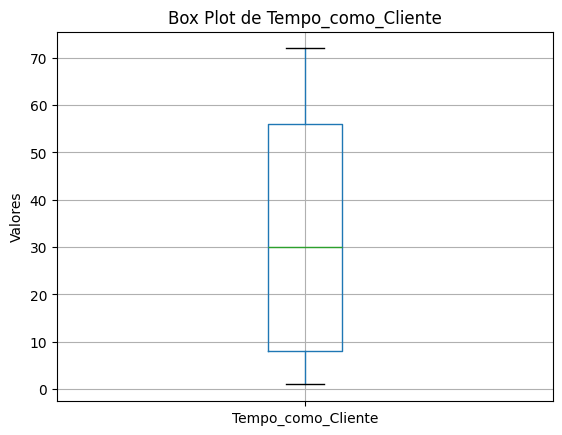

In [5]:
df.boxplot(column='Tempo_como_Cliente')
plt.title('Box Plot de Tempo_como_Cliente')
plt.ylabel('Valores')
plt.show()

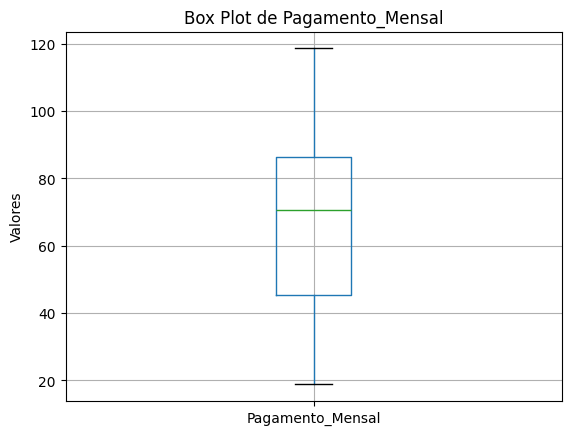

In [6]:
df.boxplot(column='Pagamento_Mensal')
plt.title('Box Plot de Pagamento_Mensal')
plt.ylabel('Valores')
plt.show()

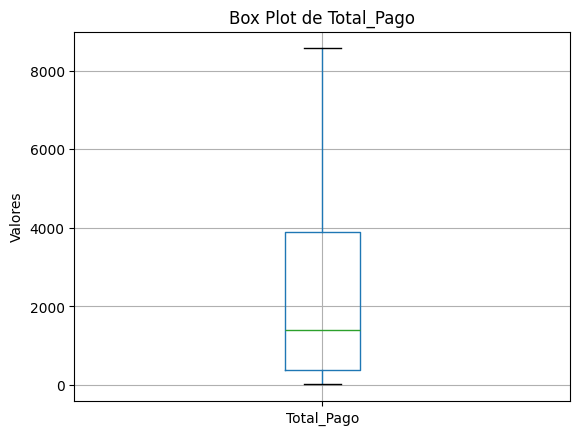

In [7]:
df.boxplot(column='Total_Pago')
plt.title('Box Plot de Total_Pago')
plt.ylabel('Valores')
plt.show()

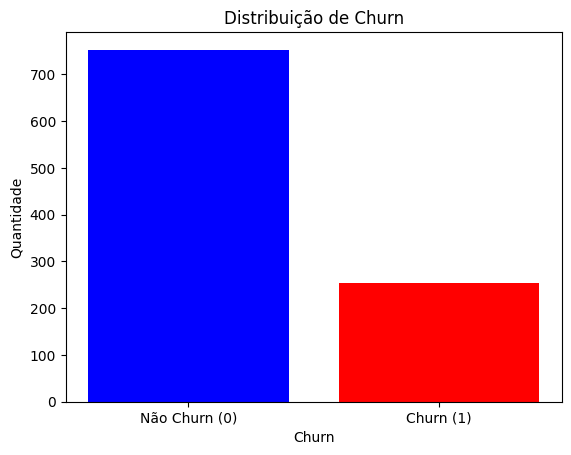

In [8]:
churn_counts = df['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values, color=['blue', 'red'])
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.title('Distribuição de Churn')
plt.xticks([0, 1], labels=['Não Churn (0)', 'Churn (1)'])
plt.show()

***Respostas***

A- Utilizando a função describe percebemos que o q2 e a média estão próximos, indicando que a análise está bem distribuida em Tempo_Como_Cliente e Pagamento_Mensal, mas não tão bem distribuida em Total_Pago.

B - Como os dados estão mal distribuidos em Total_Pago, indica fortemente a presença de um outlier elevando o valor da média.

C - Plotando os gráficos se nota basicamente o que foi pressuposto no df.describe(), uma boa distribuição entre os dados exceto no Total_Pago.

D - No caso da variável booleana Churn, nota-se uma tendência maior ao não churn, porém ainda sim com uma taxa considerável de churns

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [9]:
df[df['Total_Pago'] > 4000]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,ServicoTelefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,MetodoPagamento,Pagamento_Mensal,Total_Pago,Churn
5,9959-WOFKT,Male,No,No,Yes,71,Yes,FIBER OPTIC,Yes,No,Yes,Two year,Bank transfer (automatic),70.55,7382.25,0.0
14,6467-CHFZW,M,No,Yes,Yes,47,Yes,FIBER OPTIC,No,No,Yes,Month-to-month,Electronic check,70.55,4749.15,1.0
16,5248-YGIJN,M,No,Yes,No,72,Yes,DSL,Yes,Yes,Yes,Two year,Credit card (automatic),70.55,6369.45,0.0
18,3841-NFECX,Female,Yes,Yes,No,71,Yes,FIBER OPTIC,Yes,Yes,No,Two year,Credit card (automatic),70.55,6766.95,0.0
23,6234-RAAPL,Female,No,Yes,Yes,72,Yes,FIBER OPTIC,Yes,Yes,Yes,Two year,Bank transfer (automatic),70.55,7251.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,9135-MGVPY,Male,No,Yes,No,69,Yes,DSL,Yes,Yes,Yes,Two year,Mailed check,84.70,5878.90,0.0
985,1088-AUUZZ,Male,No,Yes,Yes,56,Yes,DSL,Yes,Yes,No,Two year,Credit card (automatic),75.85,4261.20,0.0
986,0397-GZBBC,Male,Yes,Yes,No,59,Yes,FIBER OPTIC,No,No,Yes,Month-to-month,Bank transfer (automatic),93.85,5574.75,1.0
989,7641-EUYET,Male,Yes,Yes,Yes,46,Yes,FIBER OPTIC,Yes,No,Yes,Month-to-month,Electronic check,100.70,4541.20,1.0


In [10]:
print("Porcentagem de registros onde3 'Total_Pago' > 4000: ", 
      (len(df[df['Total_Pago'] > 4000]) / len(df))*100)

Porcentagem de registros onde3 'Total_Pago' > 4000:  23.956262425447317


Realizandoa as análises sobre a coluna Total_Pago, que era a mais mal distribuida, não encontrtamos nenhum outlier aparente, apenas valores normais porém mais elevados(aproximadamente 24%), resultando em uma média maior, se optassemos por remover esses dados a análise poderia se tornar enviesada tanto pela quantidade de valores removidos quanto pela falta de distrtibuição, dificultando o modelo a analisar casos com valores mais elevados

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [11]:
df['Genero'] = df['Genero'].replace({'F': 'Female', 'f': 'Female', 'M': 'Male', 'm': 'Male'})
print(df['Genero'].unique())

['Female' 'Male']


In [12]:
df_grouped = df.groupby(['Churn','Genero']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100
fig = px.bar(df_grouped, x = 'Churn', y = 'percent', color='Genero', barmode='stack',
             labels={'Churn':'Churn', 'percent': 'Porcentagem', 'Genero':'Genero'})
fig.update_layout(title='Relação entre Churn e Gênero',
                  yaxis_title='Porcentagem',
                  legend_title='Genero')
fig.show()

In [13]:
df_grouped = df.groupby(['Churn','Idoso']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100
fig = px.bar(df_grouped, x = 'Churn', y = 'percent', color='Idoso', barmode='stack',
             labels={'Churn':'Churn', 'percent': 'Porcentagem', 'Idoso':'Idoso'})
fig.update_layout(title='Relação entre Churn e Idoso',
                  yaxis_title='Porcentagem',
                  legend_title='Idoso')
fig.show()

In [14]:
df_grouped = df.groupby(['Churn','Casado']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100
fig = px.bar(df_grouped, x = 'Churn', y = 'percent', color='Casado', barmode='stack',
             labels={'Churn':'Churn', 'percent': 'Porcentagem', 'Casado':'Casado'})
fig.update_layout(title='Relação entre Churn e Casado',
                  yaxis_title='Porcentagem',
                  legend_title='Casado')
fig.show()

In [15]:
df['Servico_Seguranca'] = df['Servico_Seguranca'].replace({'No internet service': 'No'})
df_grouped = df.groupby(['Churn','Servico_Seguranca']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100
fig = px.bar(df_grouped, x = 'Churn', y = 'percent', color='Servico_Seguranca', barmode='stack',
             labels={'Churn':'Churn', 'percent': 'Porcentagem', 'Servico_Seguranca':'Servico_Seguranca'})
fig.update_layout(title='Relação entre Churn e Servico_Seguranca',
                  yaxis_title='Porcentagem',
                  legend_title='Servico_Seguranca')
fig.show()

In [16]:
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace({'No internet service': 'No'})
df_grouped = df.groupby(['Churn','Suporte_Tecnico']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100
fig = px.bar(df_grouped, x = 'Churn', y = 'percent', color='Suporte_Tecnico', barmode='stack',
             labels={'Churn':'Churn', 'percent': 'Porcentagem', 'Suporte_Tecnico':'Suporte_Tecnico'})
fig.update_layout(title='Relação entre Churn e Suporte_Tecnico',
                  yaxis_title='Porcentagem',
                  legend_title='Suporte_Tecnico')
fig.show()

Com esses 5 gráficos, utilizando um mesmo método chegamos a algumas conclusões

1(Pontos fracos) - Mulheres possuem mais tendência a dar Churn

2(Pontos fracos) - Idosos possuem maior chance de dar Churn

3(Insight) - Casados possuem menos tendência a dar Churn

4(Pontos fortes) - Quem possui serviço de segurança ou solicitou suporte técnico possui menos chance de dar Churn

Com essas informações temos insghts valiosos. Em relação ao problema um, poderiamos dar inicio a alguma campanha de incentivo as mulheres. No problema dois poderiamos dar incentivos que se acumulariam com o tempo, consolidando o não churn entre os idosos. No ponto 4, entendemos que o cliente pode estar satisfeito com o serviço e segurança e também acredita ser satisfatório o suporte técnico